<a href="https://www.kaggle.com/code/mohamedyosef101/how-economic-status-impact-olympics-performance?scriptVersionId=199746139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How economic status impact Olympics performance
The goal is not to find the direct linear relation between `GDP` and `total` number of medals. Instead, I'm going to focus on which countires did best despite their economic status.

> Quick Note: this is not a complete notebook, and I'm still working on it.

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PATH = '/kaggle/input/2024-olympics-medals-and-economic-status/'
df = pd.read_csv(PATH + 'olympics-economics.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       90 non-null     object 
 1   country_code  90 non-null     object 
 2   gold          90 non-null     int64  
 3   silver        90 non-null     int64  
 4   bronze        90 non-null     int64  
 5   total         90 non-null     int64  
 6   gdp           90 non-null     float64
 7   gdp_year      90 non-null     int64  
 8   population    90 non-null     float64
dtypes: float64(2), int64(5), object(2)
memory usage: 6.5+ KB


As you can see the data is already clean which make finding insights easy and fast.

In [3]:
df.describe()

,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


# Quick Visuals

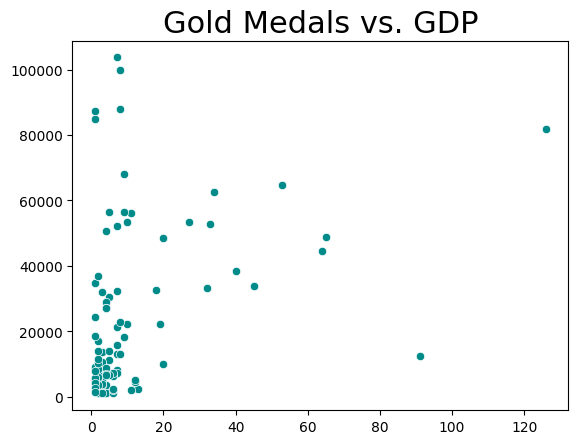

In [4]:
def scatter(x, y, title, xlabel="", ylabel=""):
    sns.scatterplot(x=x, y=y, data=df, color='darkcyan')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=22)
    plt.show()

scatter('total', 'gdp', 'Gold Medals vs. GDP')

Most countries seem clustered around lower GDP values (below 20,000), suggesting that a large number of countries have lower economic performance, but their medal counts vary widely within this range. While some countries with high GDP (above 60,000) still win relatively few medals, suggesting that wealth alone doesn’t guarantee athletic success.

**Next Steps:** <br>
I'll explore medals per capita and medals per GDP to see if normalising this data reveals more meaningful trends, particularly among smaller or less wealthy nations.

# Explore medals per GDP and per Capita

In [5]:
df['medals_per_capita'] = round((df['total'] / df['population']), 2)
df['medals_per_gdp'] = df['total'] / df['gdp']

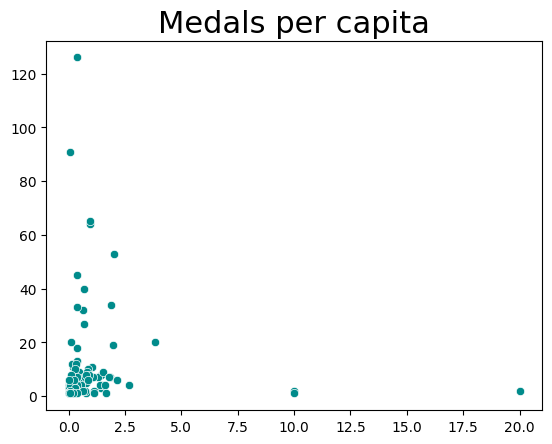

In [6]:
scatter(x='medals_per_capita', y='total', title="Medals per capita")

In [7]:
df.country[df.medals_per_capita > 9]

56    St Lucia
61    Dominica
80     Grenada
Name: country, dtype: object

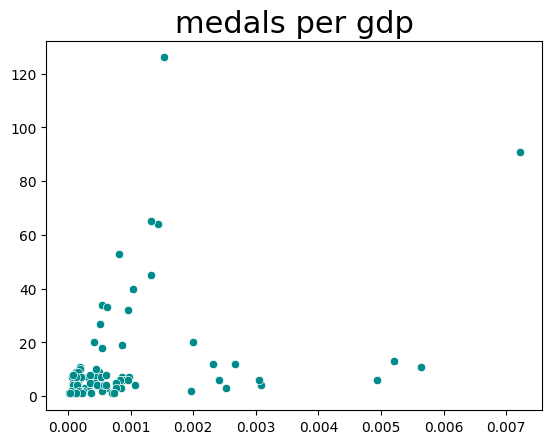

In [8]:
scatter(x='medals_per_gdp', y='total', title="medals per gdp")

In [9]:
df.country[df.medals_per_gdp >= 0.004].tolist()

['China', 'Uzbekistan', 'Kenya', 'North Korea']

This plot highlights countries that "outperform" economically, where smaller or poorer nations are punching above their weight in the Olympic Games, while larger economies are comparatively less efficient in terms of medals won per GDP.

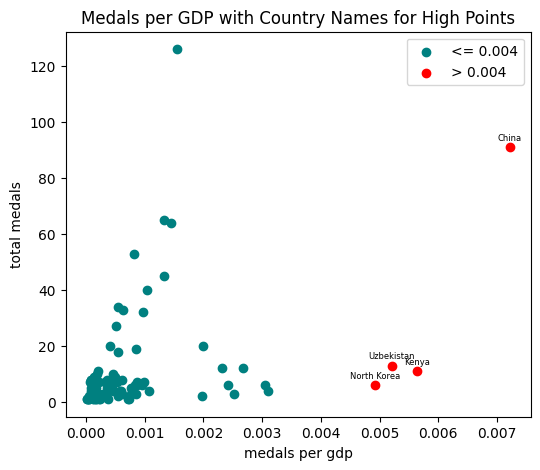

High points goes to ['China', 'Uzbekistan', 'Kenya', 'North Korea']


In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and you have columns 'medals_per_gdp', 'total', and 'country'
plt.figure(figsize=(6,5))

# Plot points where medals_per_gdp is less than or equal to 0.004
plt.scatter(df[df['medals_per_gdp'] <= 0.004]['medals_per_gdp'], 
            df[df['medals_per_gdp'] <= 0.004]['total'], 
            color='teal', label='<= 0.004')

# Plot points where medals_per_gdp is greater than 0.004
plt.scatter(df[df['medals_per_gdp'] > 0.004]['medals_per_gdp'], 
            df[df['medals_per_gdp'] > 0.004]['total'], 
            color='red', label='> 0.004')

# Annotate the points where medals_per_gdp is greater than 0.004
for i in df[df['medals_per_gdp'] > 0.004].index:
    plt.annotate(df['country'][i], 
                 (df['medals_per_gdp'][i], df['total'][i]), 
                 textcoords="offset points", 
                 xytext=(0,5),  # Adjust the offset for better visibility
                 ha='center', 
                 fontsize=6, 
                 color='black')

# Labels and Title
plt.xlabel('medals per gdp')
plt.ylabel('total medals')
plt.title('Medals per GDP with Country Names for High Points')

# Show the legend
plt.legend()

# Display plot
plt.show()
print(f"High points goes to {df.country[df.medals_per_gdp >= 0.004].tolist()}")

## To be continued ...